In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load dataset

(X_train, y_train),(X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
X_train = X_train.reshape(X_train.shape[0], -1).astype('float32') / 255

In [5]:
X_test = X_test.reshape(X_test.shape[0], -1).astype('float32') / 255

In [6]:
#Define the model
def create_model():
    model= Sequential([
        Dense(128, activation='relu', input_shape=(784,)),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model


In [7]:
#define Optimizer
optimizers = {
    'SGD':SGD(),
    'Adam':Adam(),
    'RRMSprop':RMSprop(),
    'Adagrad':Adagrad()
    }

In [8]:
#Train model with different optimizers
history={}
for optimizer_name, optimizer in optimizers.items():
    print(f"Training with {optimizer_name} optimizer...")
    model = create_model()
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    history[optimizer_name]=model.fit(X_train, y_train, epochs=5, batch_size = 32, validation_split=0.2,verbose=0)
    

Training with SGD optimizer...


C:\Users\Priyanka\.conda\envs\priya\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with Adam optimizer...
Training with RRMSprop optimizer...
Training with Adagrad optimizer...


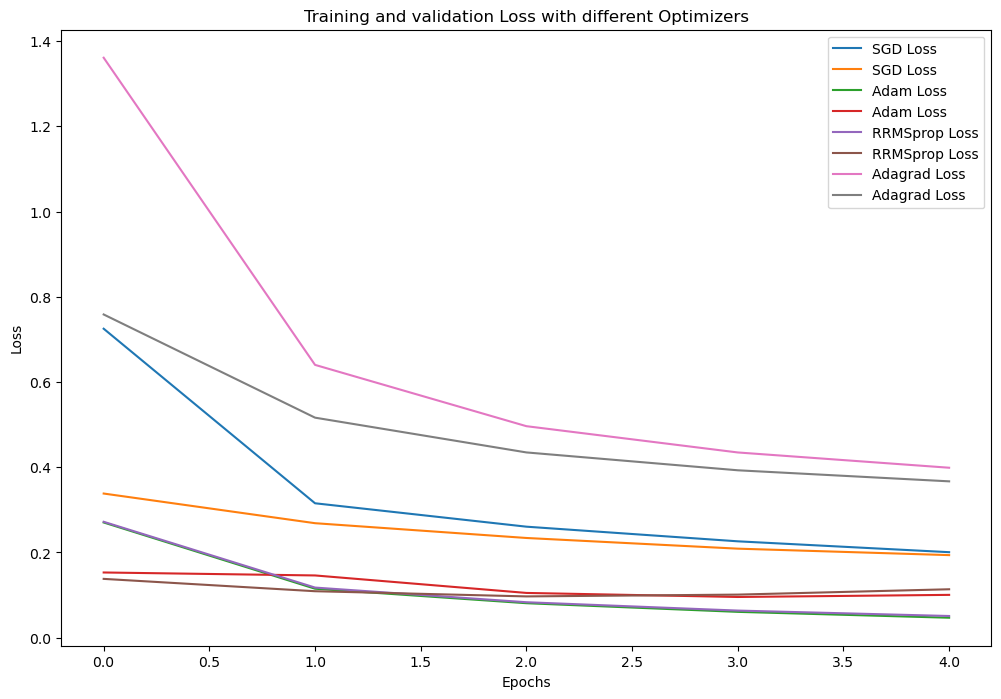

In [9]:
plt.figure(figsize=(12, 8))
for optimizer_name in optimizers.keys():
    plt.plot(history[optimizer_name].history['loss'], label=f'{optimizer_name} Loss')
    plt.plot(history[optimizer_name].history['val_loss'], label=f'{optimizer_name} Loss')
    
plt.title('Training and validation Loss with different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()